In [1]:
!pip install scanpy

Defaulting to user installation because normal site-packages is not writeable


In [7]:
conda install -c bioconda scanpy


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found to be incompatible with each other:

Output in format: Requested package -> Available versions


Note: you may need to restart the kernel to use updated packages.


In [2]:
import scanpy as sc

In [3]:
from umap import UMAP
import umap
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN
import seaborn as sns

In [4]:
reducer = umap.UMAP(random_state = 50)

In [9]:
data = sc.read('Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad')

In [51]:
print(data)

AnnData object with n_obs × n_vars = 44721 × 26361
    obs: 'Admission', 'ClusterID', 'DPS', 'DTF', 'Donor_full', 'HLA1', 'IFN1', 'Sex', 'Status', 'Ventilated', 'cell_type_coarse', 'cell_type_fine', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'percent_mt', 'percent_rpl', 'percent_rps', 'percent_rrna', 'seurat_clusters', 'singler'
    var: 'Selected', 'sct_detection_rate', 'sct_gmean', 'sct_residual_mean', 'sct_residual_variance', 'sct_variable', 'sct_variance'
    uns: 'assay', 'authors', 'disease', 'organism', 'preprint', 'short_name', 'tissue'
    obsm: 'X_pca', 'X_umap'
    varm: 'pca_feature_loadings'
    layers: 'matrix', 'norm_data', 'scale_data'


In [10]:
?sc

Type:        module
String form: <module 'scanpy' from '/home/elisa/.local/lib/python3.7/site-packages/scanpy/__init__.py'>
File:        ~/.local/lib/python3.7/site-packages/scanpy/__init__.py
Docstring:   <no docstring>


In [21]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline

In [22]:
data.shape

(44721, 26361)

In [23]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [24]:
data.shape

(44721, 26361)

In [25]:
data

AnnData object with n_obs × n_vars = 44721 × 26361
    obs: 'Admission', 'ClusterID', 'DPS', 'DTF', 'Donor_full', 'HLA1', 'IFN1', 'Sex', 'Status', 'Ventilated', 'cell_type_coarse', 'cell_type_fine', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'percent_mt', 'percent_rpl', 'percent_rps', 'percent_rrna', 'seurat_clusters', 'singler'
    var: 'Selected', 'sct_detection_rate', 'sct_gmean', 'sct_residual_mean', 'sct_residual_variance', 'sct_variable', 'sct_variance'
    uns: 'assay', 'authors', 'disease', 'organism', 'preprint', 'short_name', 'tissue'
    obsm: 'X_pca', 'X_umap'
    varm: 'pca_feature_loadings'
    layers: 'matrix', 'norm_data', 'scale_data'

In [26]:
covidX   = data.X    #actual gene expression data
covidobs = data.obs  #data about the patients
covidvar = data.var  #data about the distribution of each gene
coviduns = data.uns  #metadata of the object

In [27]:
covidX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
covidobs.head()

,Admission,ClusterID,DPS,DTF,Donor_full,HLA1,IFN1,Sex,Status,Ventilated,...,nCount_RNA,nCount_SCT,nFeature_RNA,nFeature_SCT,percent_mt,percent_rpl,percent_rps,percent_rrna,seurat_clusters,singler
covid_555_1.1,ICU,13,9,9,C1 A,-0.026053,0.015625,M,COVID,NonVent,...,1222.0,1682.0,125,126,1.309329,0.245499,0.081833,46.644844,12,Erythroblast
covid_555_1.2,ICU,10,9,9,C1 A,0.023525,-0.000322,M,COVID,NonVent,...,1099.0,1700.0,160,160,13.102820,0.363967,0.363967,58.780708,9,B_cell
covid_555_1.3,ICU,19,9,9,C1 A,-0.044271,0.086385,M,COVID,NonVent,...,1055.0,1661.0,212,213,2.938389,0.947867,0.663507,55.829384,18,B_cell
covid_555_1.7,ICU,10,9,9,C1 A,-0.038040,0.022590,M,COVID,NonVent,...,2411.0,1971.0,312,312,10.908337,0.165906,0.041477,67.399422,9,B_cell
covid_555_1.8,ICU,22,9,9,C1 A,-0.043605,0.010739,M,COVID,NonVent,...,2276.0,1948.0,336,336,11.203866,0.307557,0.263620,67.355011,21,B_cell


In [29]:
data.uns

OverloadedDict, wrapping:
	{'assay': 'Seq-Well', 'authors': array(["{'name': 'Aaron J Wilk'}", "{'name': 'Arjun Rustagi'}",
       "{'name': 'Nancy Q Zhao'}", "{'name': 'Jonasel Roque'}",
       "{'name': 'Giovanny J Martinez-Colon'}",
       "{'name': 'Julia L McKechnie'}", "{'name': 'Geoffrey T Ivison'}",
       "{'name': 'Thanmayi Ranganath'}", "{'name': 'Rosemary Vergara'}",
       "{'name': 'Taylor Hollis'}", "{'name': 'Laura J Simpson'}",
       "{'name': 'Philip Grant'}", "{'name': 'Aruna Subramanian'}",
       "{'name': 'Angela J Rogers', 'email': 'ajrogers@stanford.edu'}",
       "{'name': 'Catherine A Blish', 'email': 'cblish@stanford.edu'}"],
      dtype=object), 'disease': array(['COVID-19', ''], dtype=object), 'organism': 'Homo sapiens', 'preprint': {'date': '2020-04-23', 'doi': 'https://doi.org/10.1101/2020.04.17.20069930', 'title': 'A single-cell atlas of the peripheral immune response to severe COVID-19'}, 'short_name': 'Single_cell_atlas_of_peripheral_immune_response_t

In [30]:
data.obs

,Admission,ClusterID,DPS,DTF,Donor_full,HLA1,IFN1,Sex,Status,Ventilated,...,nCount_RNA,nCount_SCT,nFeature_RNA,nFeature_SCT,percent_mt,percent_rpl,percent_rps,percent_rrna,seurat_clusters,singler
covid_555_1.1,ICU,13,9,9,C1 A,-0.026053,0.015625,M,COVID,NonVent,...,1222.0,1682.0,125,126,1.309329,0.245499,0.081833,46.644844,12,Erythroblast
covid_555_1.2,ICU,10,9,9,C1 A,0.023525,-0.000322,M,COVID,NonVent,...,1099.0,1700.0,160,160,13.102820,0.363967,0.363967,58.780708,9,B_cell
covid_555_1.3,ICU,19,9,9,C1 A,-0.044271,0.086385,M,COVID,NonVent,...,1055.0,1661.0,212,213,2.938389,0.947867,0.663507,55.829384,18,B_cell
covid_555_1.7,ICU,10,9,9,C1 A,-0.038040,0.022590,M,COVID,NonVent,...,2411.0,1971.0,312,312,10.908337,0.165906,0.041477,67.399422,9,B_cell
covid_555_1.8,ICU,22,9,9,C1 A,-0.043605,0.010739,M,COVID,NonVent,...,2276.0,1948.0,336,336,11.203866,0.307557,0.263620,67.355011,21,B_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HIP045.2543,N/A,7,0,0,H6,0.588374,0.092001,M,Healthy,Healthy,...,6103.0,1959.0,2460,1080,6.898247,3.637555,2.867442,10.797968,6,Monocyte
HIP045.2544,N/A,21,0,0,H6,1.295145,0.045697,M,Healthy,Healthy,...,7324.0,2088.0,2488,1031,6.485527,6.157837,4.929000,12.738940,20,Monocyte
HIP045.2545,N/A,21,0,0,H6,0.892457,0.062819,M,Healthy,Healthy,...,6368.0,1929.0,2511,1021,4.742462,6.171483,4.978015,14.400126,20,T_cells
HIP045.2546,N/A,11,0,0,H6,0.020954,0.036953,M,Healthy,Healthy,...,6669.0,1918.0,2650,1063,4.573400,3.328835,2.998950,14.574899,10,Monocyte


In [31]:
data.var

,Selected,sct_detection_rate,sct_gmean,sct_residual_mean,sct_residual_variance,sct_variable,sct_variance
5S-rRNA,0.0,0.000261,0.000189,0.000651,1.164300,0,0.000321
7SK,0.0,0.027394,0.020371,0.005464,1.062872,0,0.035997
A1BG,0.0,0.001785,0.001268,0.002331,1.063613,0,0.002062
A1BG-AS1,0.0,0.000501,0.000356,0.001971,1.150165,0,0.000561
A1CF,0.0,0.001324,0.000942,0.002839,1.158183,0,0.001502
...,...,...,...,...,...,...,...
UGT2B17,0.0,0.001163,0.000859,-0.001669,0.938646,0,0.001663
Vault,0.0,0.000201,0.000139,-0.002708,0.750773,0,0.000201
XX-CR54.1,0.0,0.000221,0.000153,-0.002593,0.731583,0,0.000221
XXbac-B135H6.18,0.0,0.000983,0.000706,0.000535,1.047113,0,0.001162


In [61]:
patients = covidobs.index
genes = covidvar.index
exp_df = pd.DataFrame(data = covidX, columns = genes, index = patients)
exp_df[300:600]

,5S-rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A4GALT,A4GNT,...,TRBJ2-6,TRBV10-1,TRBV6-4,TRBV6-8,TTLL13,UGT2B17,Vault,XX-CR54.1,XXbac-B135H6.18,ZBTB40-IT1
covid_555_1.333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
covid_555_1.639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_555_1.643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
reducer = umap.UMAP(random_state = 34)

In [59]:
covidX[4]


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [67]:
cell_type_COVID_HEALTHY = []
i = 0
for id, row in covidobs.iterrows():
        cell_type_COVID_HEALTHY.append(covidX[i])

cell_type_COVID = [][]
i = 0
for id, row in covidobs.iterrows():
    if row["Status"] == "COVID":
        cell_type_COVID[0]=covidX[i]
        
cell_type_HEALTHY = []
i = 0
for id, row in covidobs.iterrows():
    if row["Status"] == "Healthy":
        cell_type_HEALTHY.append(covidX[i])


Creating a data frame with the 'covid genes'

In [78]:
covidX_covid = covidX[covidobs.Status == "COVID"]

In [79]:
covidX_covid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
reducer.fit(cell_type_COVID)

UMAP(random_state=34)

In [81]:
fit = umap.UMAP()
%time u = fit.fit_transform(covidX)

CPU times: user 28min 14s, sys: 32.6 s, total: 28min 47s
Wall time: 6min 32s


In [70]:
u

array([[0.44726297, 5.4707727 ],
       [2.8875575 , 5.191081  ],
       [5.1586676 , 5.36742   ],
       ...,
       [1.0927353 , 8.912792  ],
       [1.4613214 , 9.933232  ],
       [5.6910033 , 6.700217  ]], dtype=float32)

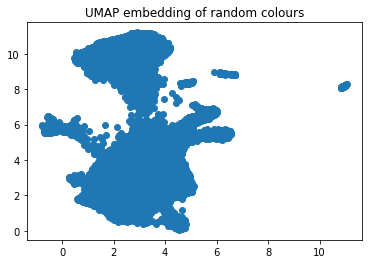

In [73]:
plt.scatter(u[:,0], u[:,1])
plt.title('UMAP clustering for all the genes');

Creating the UMAP algorithm and clustering for covid genes

In [84]:
fit_covid = umap.UMAP()
%time u_c = fit_covid.fit_transform(covidX_covid)

CPU times: user 16min 40s, sys: 15.7 s, total: 16min 56s
Wall time: 3min 38s


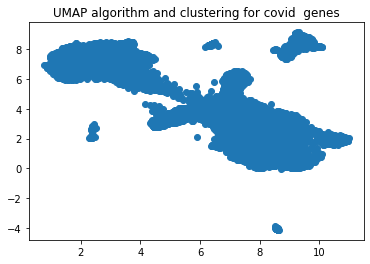

In [87]:
plt.scatter(u_c[:,0], u_c[:,1])
plt.title('UMAP algorithm and clustering for covid  genes');

Creating the UMAP algorithm and clustering for healthy genes

In [89]:
covidX_healthy = covidX[covidobs.Status == "Healthy"]

In [ ]:
fit_healthy = umap.UMAP()
%time u_h = fit_healthy.fit_transform(covidX_healthy)

In [ ]:
plt.scatter(u_h[:,0], u_h[:,1])
plt.title('UMAP algorithm and clustering for heal');